In [ ]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import tdt
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
import xarray as xr

import kdephys.hypno as kh
import kdephys.pd as kpd
import kdephys.xr as kx
import kdephys.utils as ku
import kdephys.ssfm as ss

import acr.subjects as subs
import acr
import acr.utils as acu
import plotly.express as px
plt.style.use('acr_plots.mplstyle')

In [ ]:
a13, s13, b13, h13 = acr.io.acr_load_master(subs.a13, type='pandas', stores=['LFP_', 'LFPo', 'EEGr'])

In [6]:
a13 = kpd.pd_utils.add_states_to_dataset(a13, h13)

In [ ]:
acr.io.save_dataset(b13, subs.a13)

In [ ]:
acr.io.save_dataset(a13, subs.a13, type='-data')

In [ ]:
bp = acr.io.load_saved_dataset(subs.a13, '-bp', data_tags=['-EEGr', '-LFPo', '-LFP_'])
h = acr.io.load_hypno(subs.a13, bp, data_tag='EEGr')
bp = kpd.pd_utils.add_states_to_dataset(bp, h)

In [141]:
bp = kpd.pd_utils.add_states_to_dataset(bp, h)

# What is the issue?

In [169]:
er = ('2022-09-09 11:00', '2022-09-09 12:30')
lr = ('2022-09-09 14:00', '2022-09-09 17:00')
light_bl = ('2022-09-08 07:00', '2022-09-08 19:00')
dark_bl = ('2022-09-08 21:00', '2022-09-09 07:00')
dark_morn = ('2022-09-09 03:00', '2022-09-09 07:00')

In [128]:
p = bp['laser1-LFP_']
o = bp['laser1-LFPo']

pbl = bp['laser1-bl-LFP_'].xt(light_bl)
obl = bp['laser1-bl-LFPo'].xt(light_bl)
prel = p.avg(pbl)
orel = o.avg(obl)

In [175]:
prel_2 = p.avg(pmrn)
orel_2 = o.avg(omrn)

It seems there was no decline in delta power during the photoinhibition, and maybe even a slight increase:

Text(0.0, 1.0, 'PI period, LFP delta, channel 13')

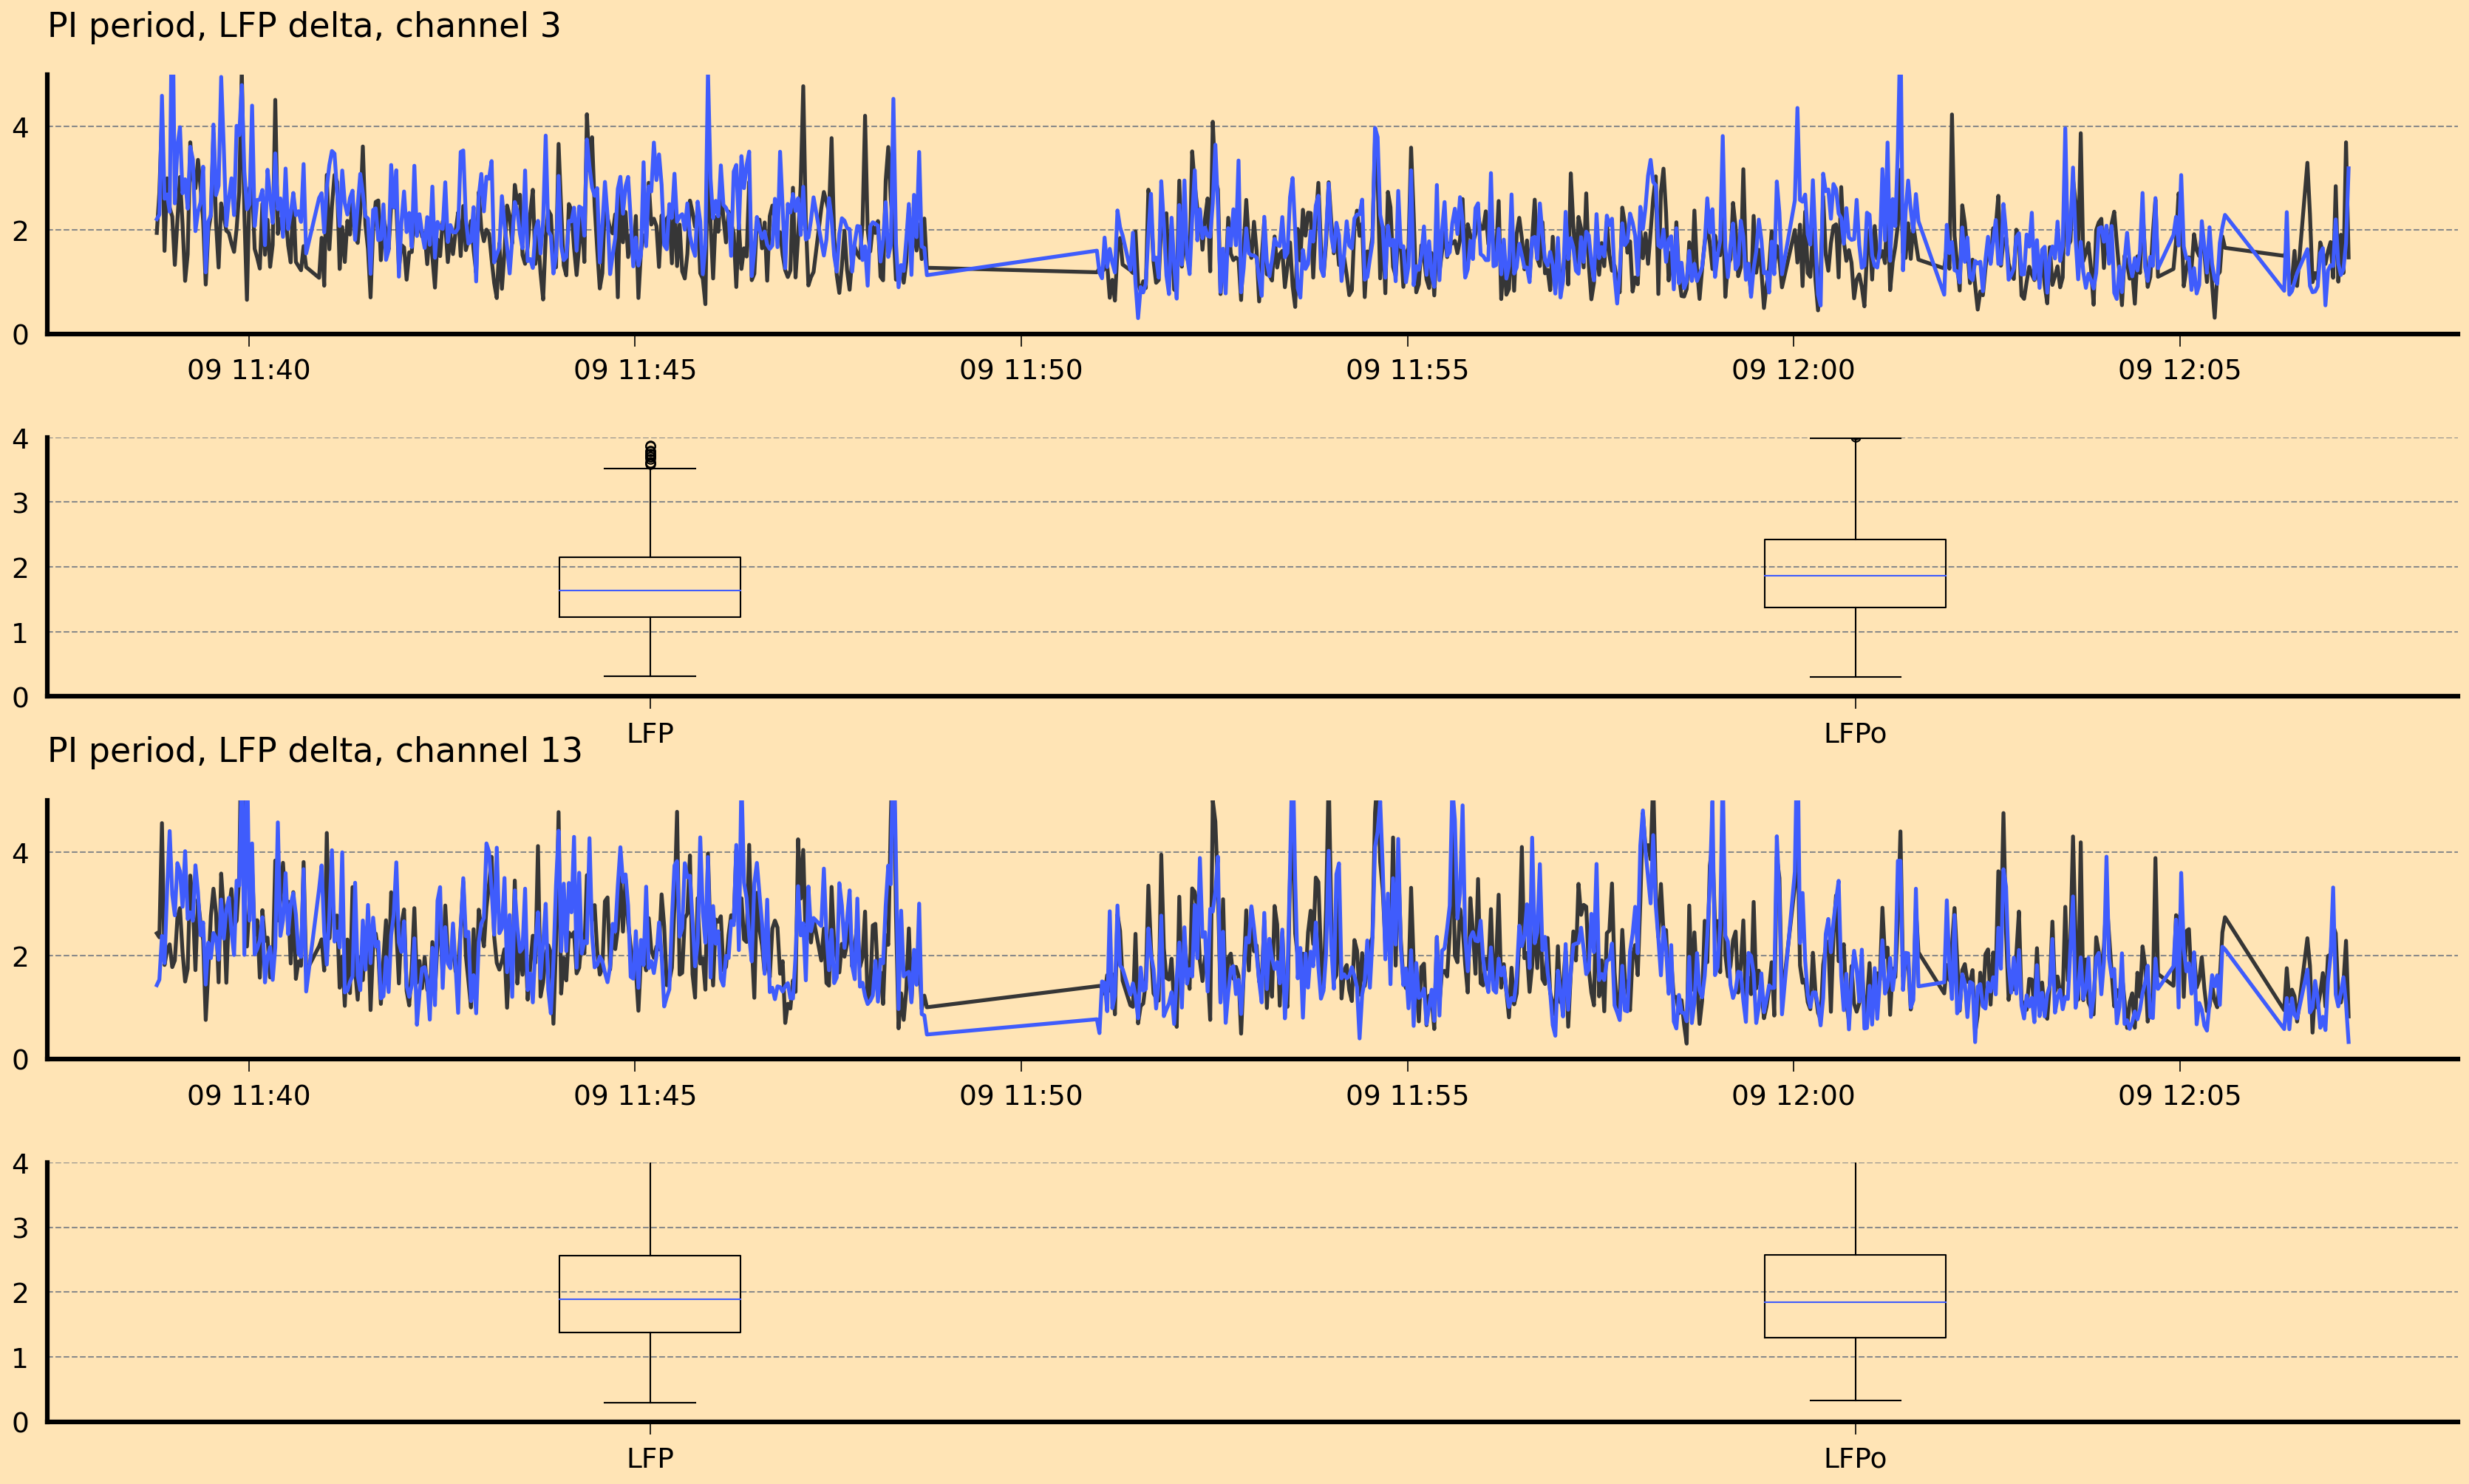

In [150]:
f, ax = plt.subplots(4, 1, figsize=(25, 15))
ax[0].plot(prel.xc(3).st().xt(er).dt(), prel.xc(3).st().xt(er).delta)
ax[0].plot(orel.xc(3).st().xt(er).dt(), orel.xc(3).st().xt(er).delta)
ax[1].boxplot([prel.xc(3).st().xt(er).delta, orel.xc(3).st().xt(er).delta], labels=['LFP', 'LFPo'])
ax[0].set_ylim(0, 5)
ax[1].set_ylim(0, 4)
ax[0].set_title('PI period, LFP delta, channel 3')

ax[2].plot(prel.xc(13).st().xt(er).dt(), prel.xc(13).st().xt(er).delta)
ax[2].plot(orel.xc(13).st().xt(er).dt(), orel.xc(13).st().xt(er).delta)
ax[3].boxplot([prel.xc(13).st().xt(er).delta, orel.xc(13).st().xt(er).delta], labels=['LFP', 'LFPo'])
ax[2].set_ylim(0, 5)
ax[3].set_ylim(0, 4)
ax[2].set_title('PI period, LFP delta, channel 13')

Text(0.0, 1.0, 'Late-Rebound period, LFP delta, channel 13')

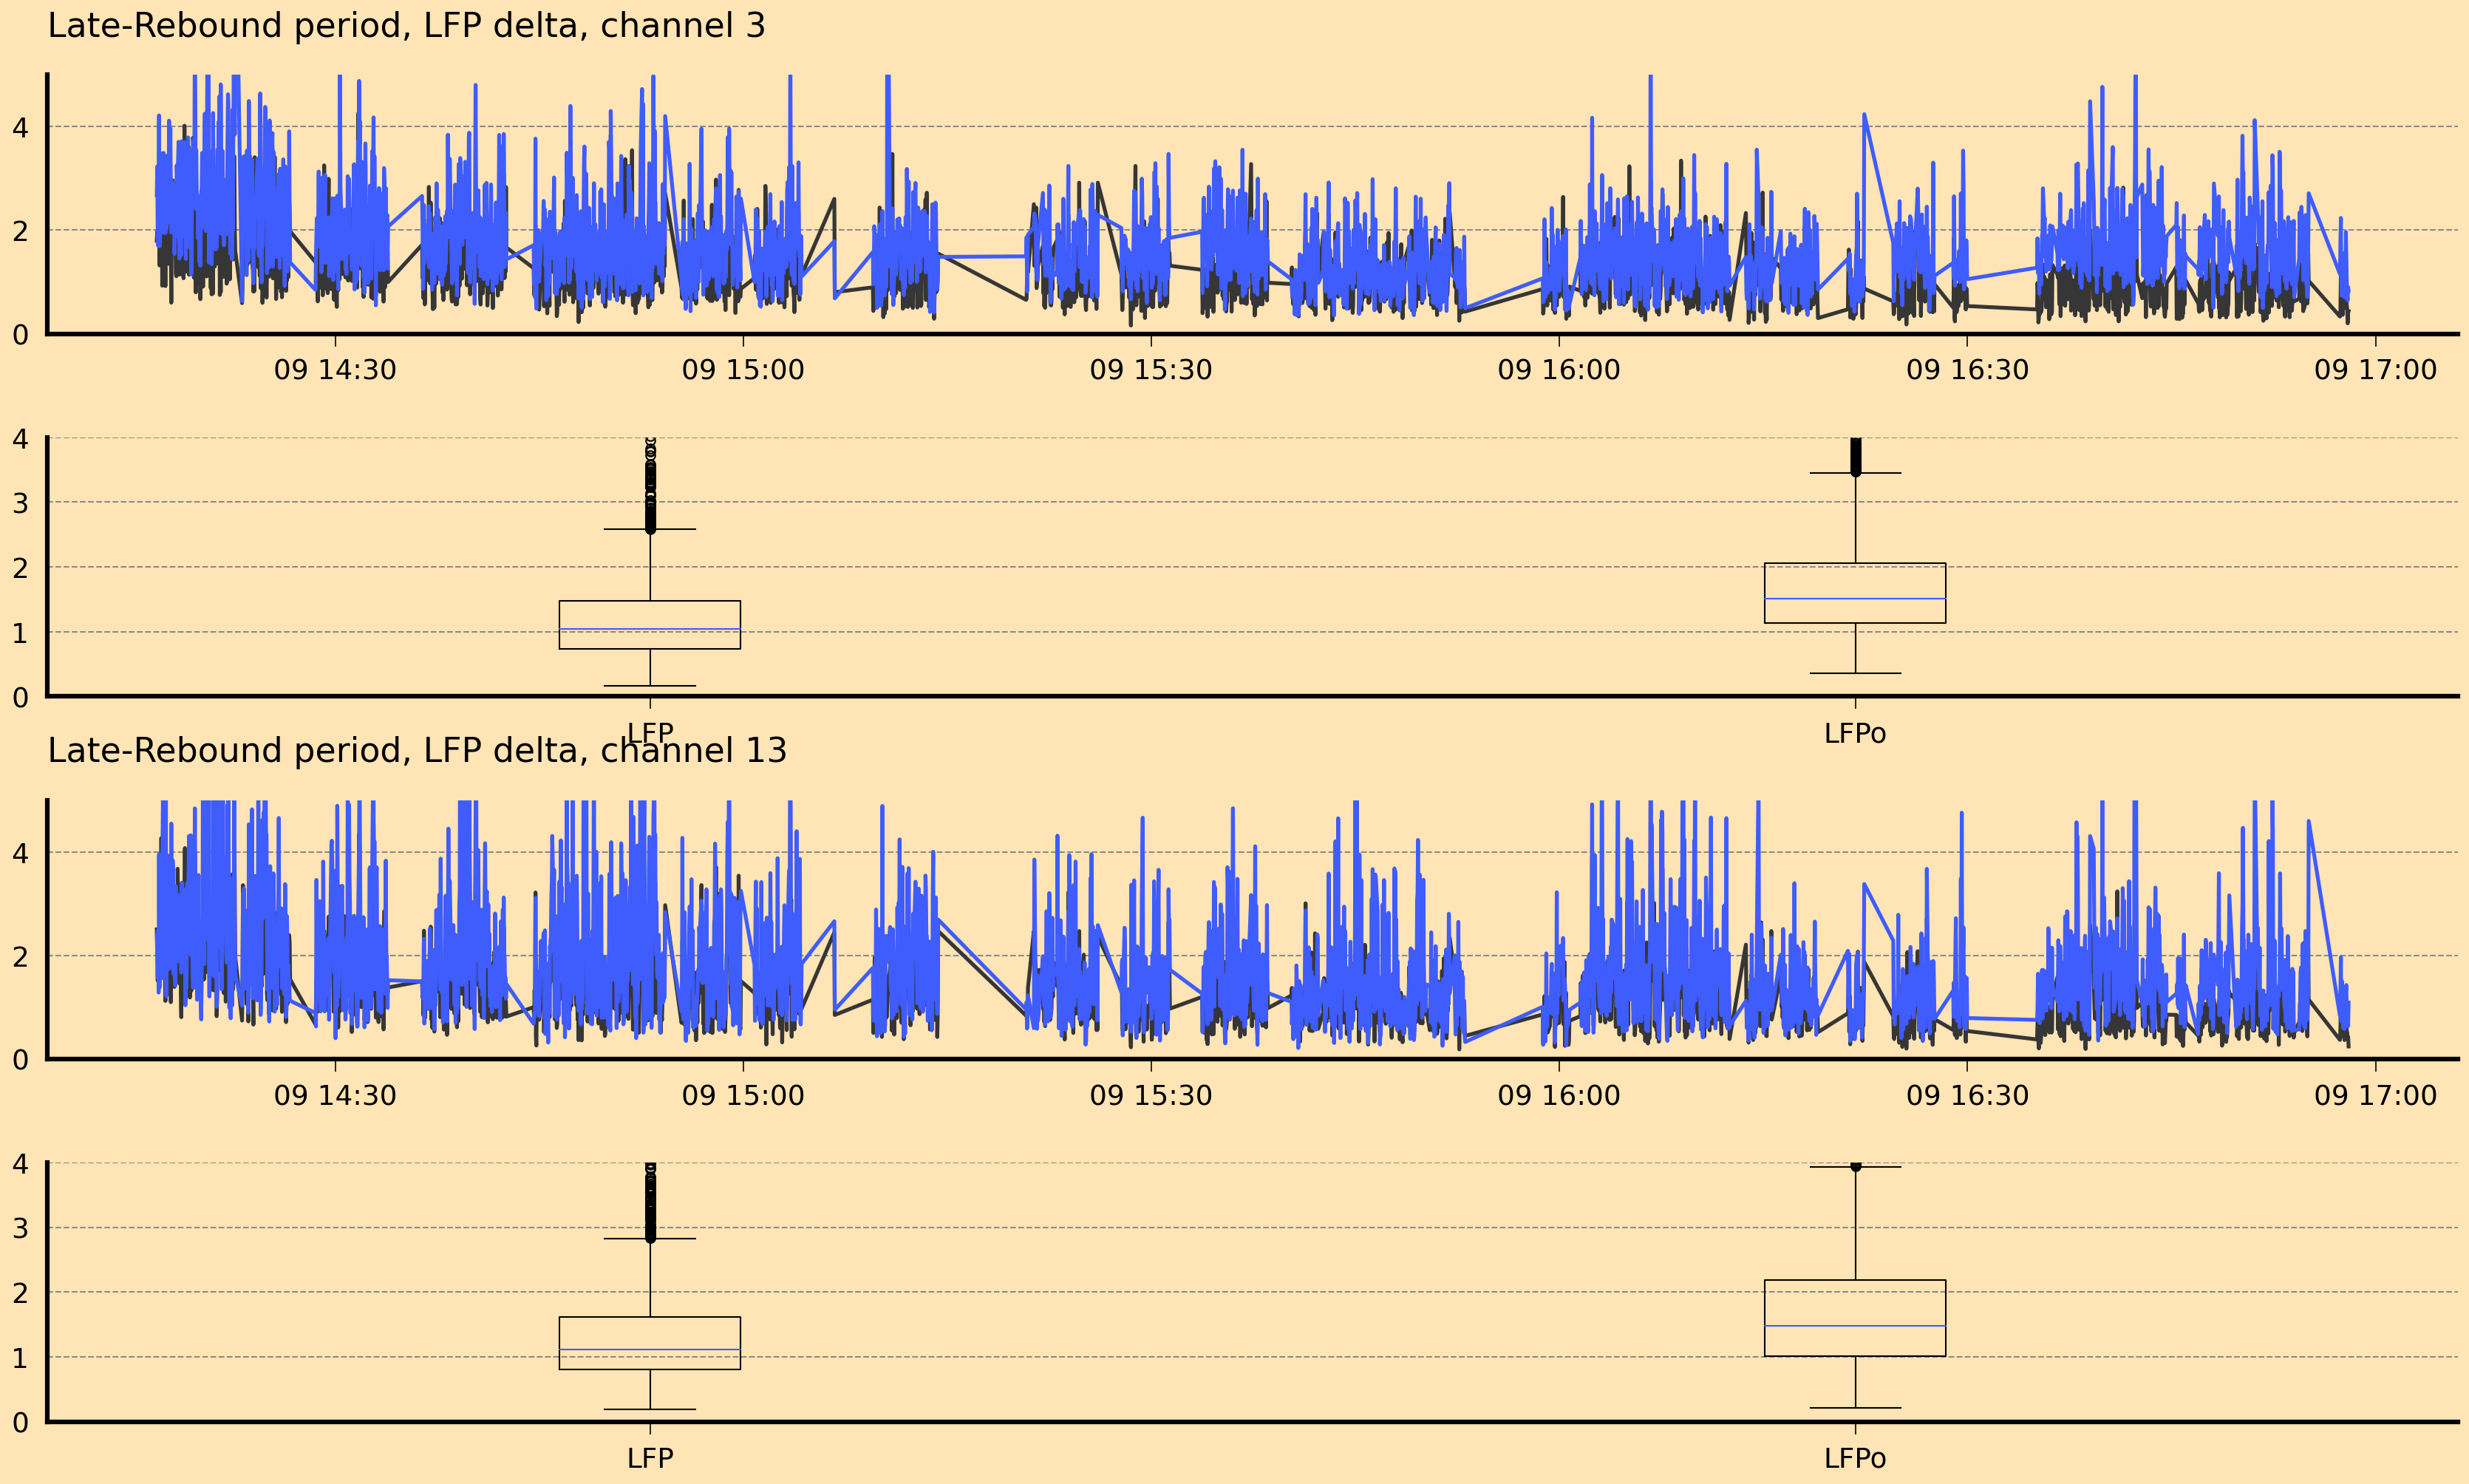

In [152]:
f, ax = plt.subplots(4, 1, figsize=(25, 15))
ax[0].plot(prel.xc(3).st().xt(lr).dt(), prel.xc(3).st().xt(lr).delta)
ax[0].plot(orel.xc(3).st().xt(lr).dt(), orel.xc(3).st().xt(lr).delta)
ax[1].boxplot([prel.xc(3).st().xt(lr).delta, orel.xc(3).st().xt(lr).delta], labels=['LFP', 'LFPo'])
ax[0].set_ylim(0, 5)
ax[1].set_ylim(0, 4)
ax[0].set_title('Late-Rebound period, LFP delta, channel 3')

ax[2].plot(prel.xc(13).st().xt(lr).dt(), prel.xc(13).st().xt(lr).delta)
ax[2].plot(orel.xc(13).st().xt(lr).dt(), orel.xc(13).st().xt(lr).delta)
ax[3].boxplot([prel.xc(13).st().xt(lr).delta, orel.xc(13).st().xt(lr).delta], labels=['LFP', 'LFPo'])
ax[2].set_ylim(0, 5)
ax[3].set_ylim(0, 4)
ax[2].set_title('Late-Rebound period, LFP delta, channel 13')

## Post-Rebound Period:

Looking at the post-experiment period (here 9:30pm - 3am), when the effect of the laser should CERTAINLY be worn off, we see that the optrode delta values are still somewhat elevated:

In [145]:
pp = kpd.pd_utils.add_states_to_data(bp['laser1-post1-LFP_'], h['laser1-post1'])
op = kpd.pd_utils.add_states_to_data(bp['laser1-post1-LFPo'], h['laser1-post1'])


pprel = pp.avg(pbl)
oprel = op.avg(obl)

Text(0.0, 1.0, 'Post-Exeriment period, LFP delta, channel 13')

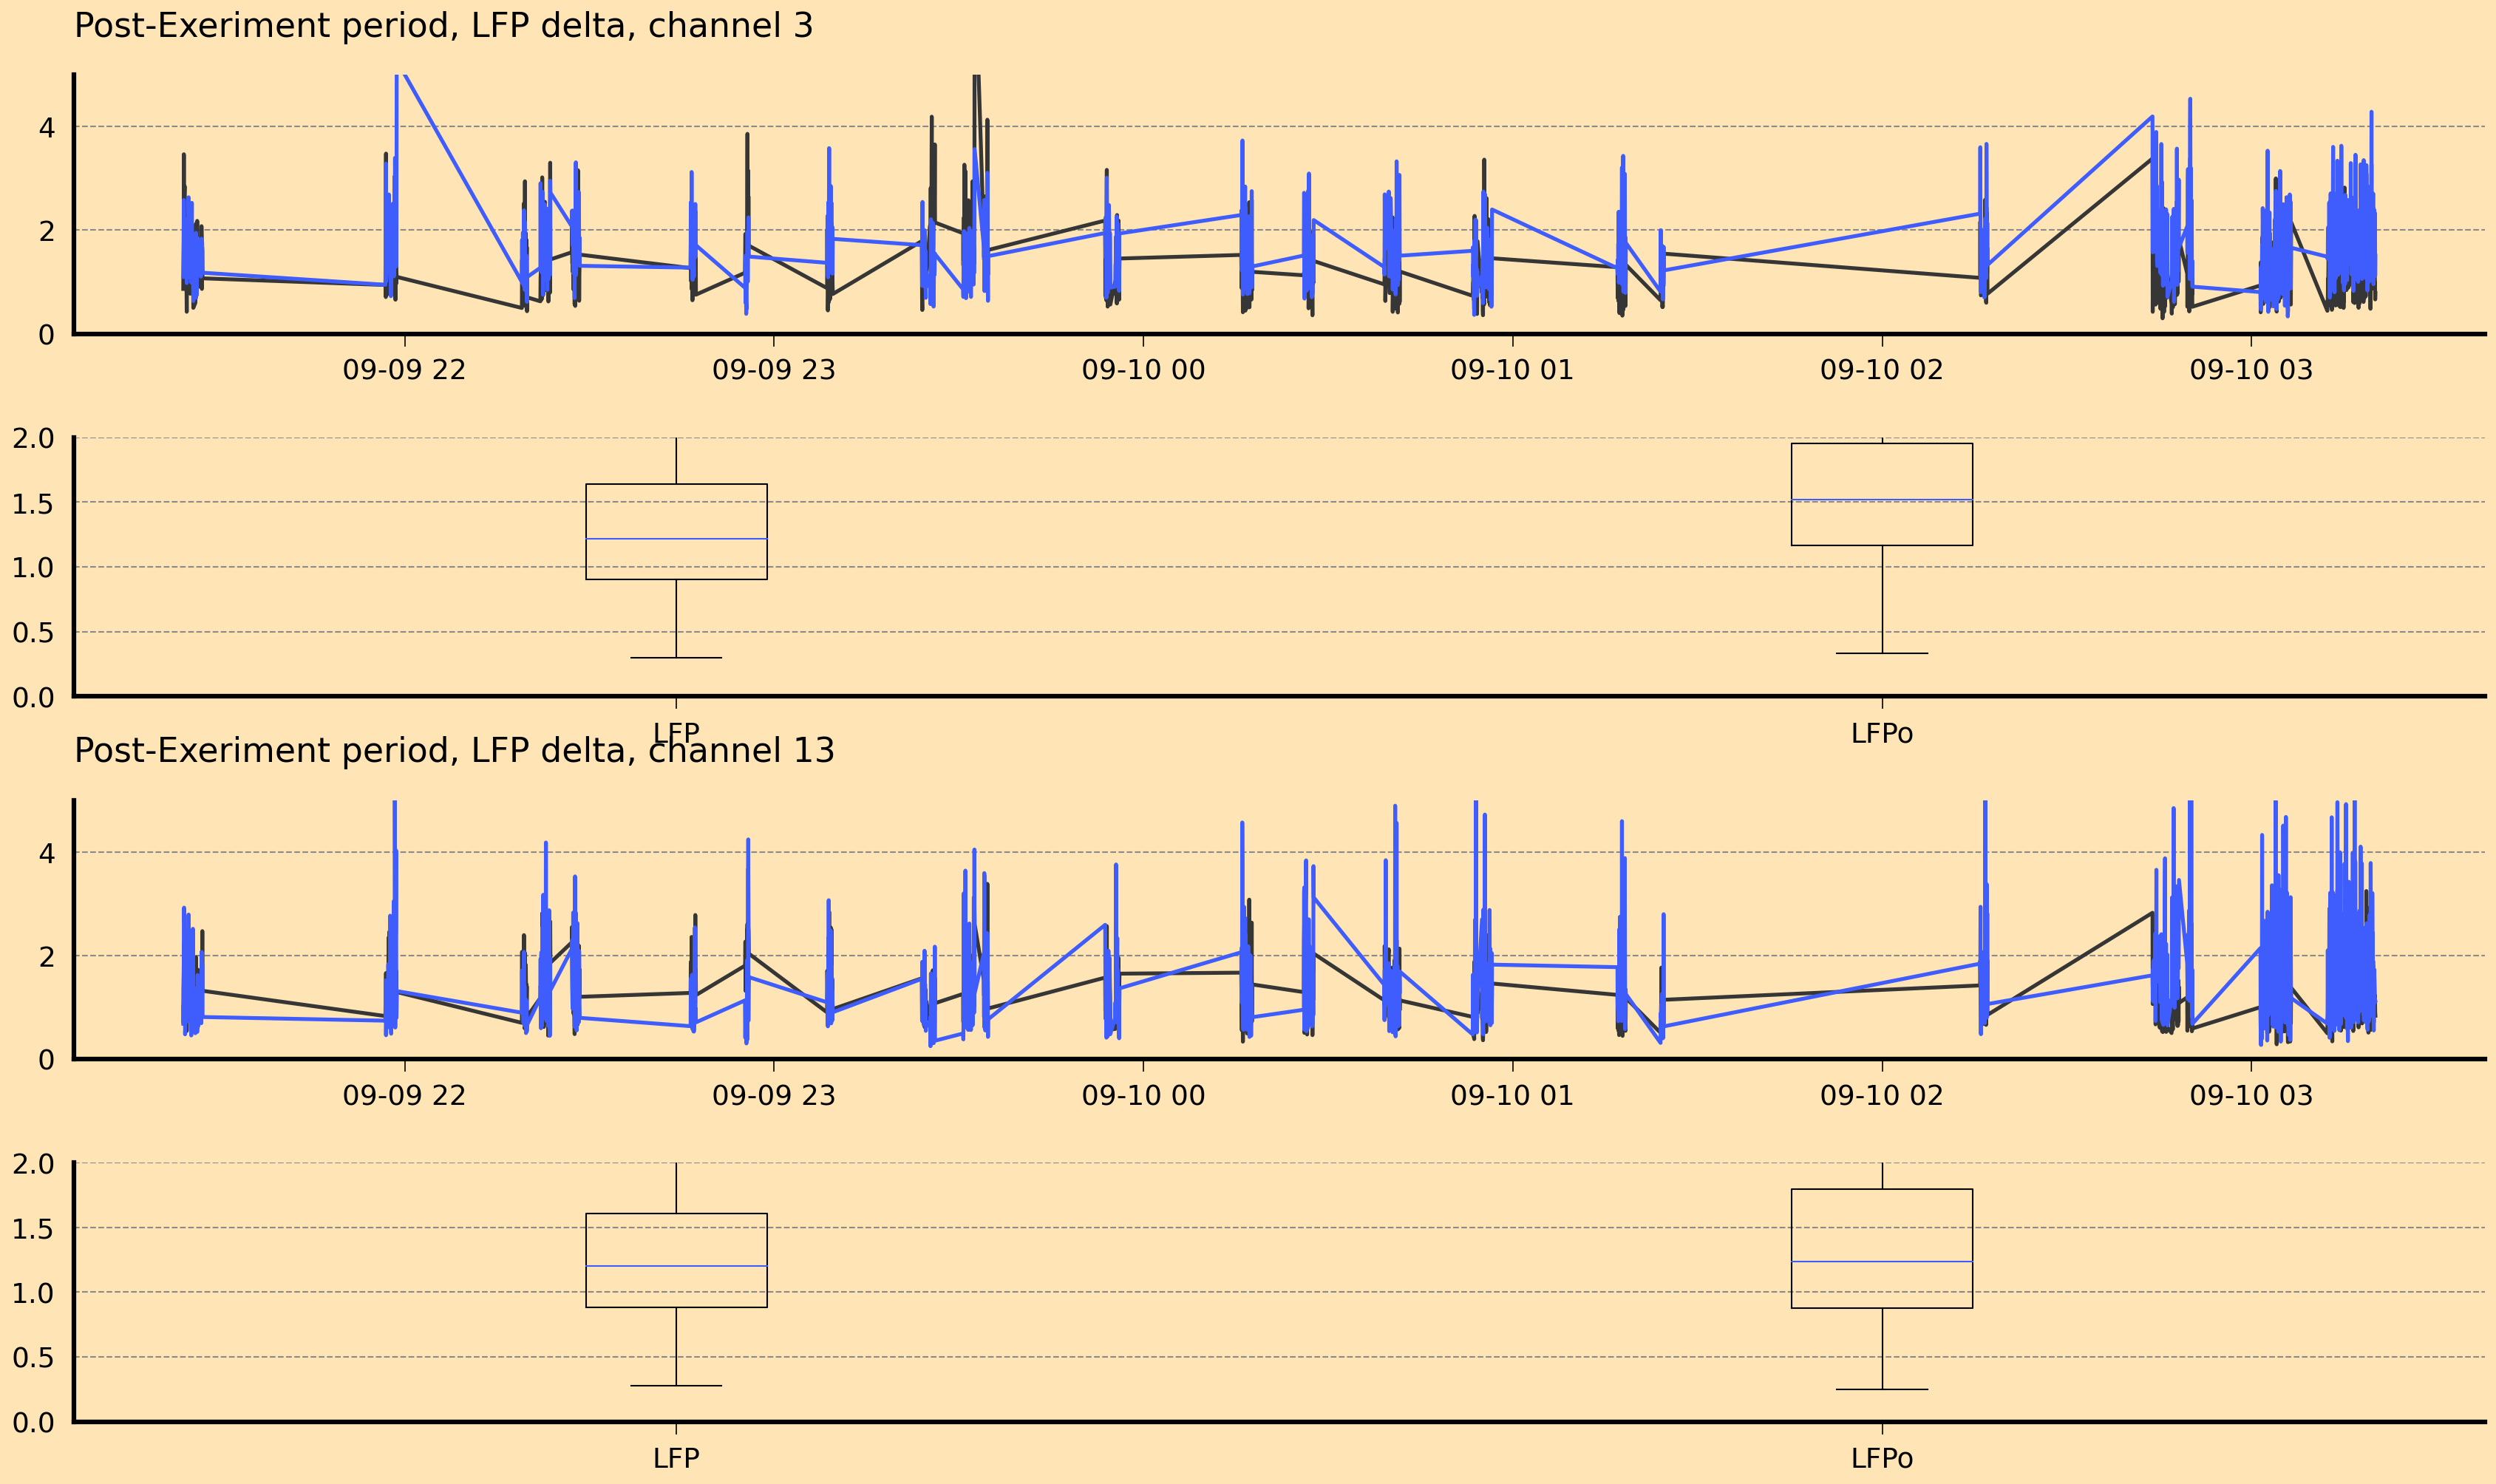

In [158]:
f, ax = plt.subplots(4, 1, figsize=(25, 15))
ax[0].plot(pprel.xc(3).st().dt(), pprel.xc(3).st().delta)
ax[0].plot(oprel.xc(3).st().dt(), oprel.xc(3).st().delta)
ax[1].boxplot([pprel.xc(3).st().delta, oprel.xc(3).st().delta], labels=['LFP', 'LFPo'])
ax[0].set_ylim(0, 5)
ax[1].set_ylim(0, 2)
ax[0].set_title('Post-Exeriment period, LFP delta, channel 3')

ax[2].plot(pprel.xc(13).st().dt(), pprel.xc(13).st().delta)
ax[2].plot(oprel.xc(13).st().dt(), oprel.xc(13).st().delta)
ax[3].boxplot([pprel.xc(13).st().delta, oprel.xc(13).st().delta], labels=['LFP', 'LFPo'])
ax[2].set_ylim(0, 5)
ax[3].set_ylim(0, 2)
ax[2].set_title('Post-Exeriment period, LFP delta, channel 13')

# What about during Dark Period of Baseline?

Now looking at the dark period of the baseline (9pm-9am), before the PZ5 switch would have happened

The increased delta power on the optrode now looks to be gone, or at the least highly diminished:

In [154]:
pdrk = bp['laser1-bl-LFP_'].xt(dark_bl)
odrk = bp['laser1-bl-LFPo'].xt(dark_bl)

pdrkrel = pdrk.avg(pbl)
odrkrel = odrk.avg(obl)

In [173]:
pmrn = bp['laser1-bl-LFP_'].xt(dark_morn)
omrn = bp['laser1-bl-LFPo'].xt(dark_morn)

pmrnrel = pmrn.avg(pbl)
omrnrel = omrn.avg(obl)

Text(0.0, 1.0, 'BL-Dark period, LFP delta, channel 13')

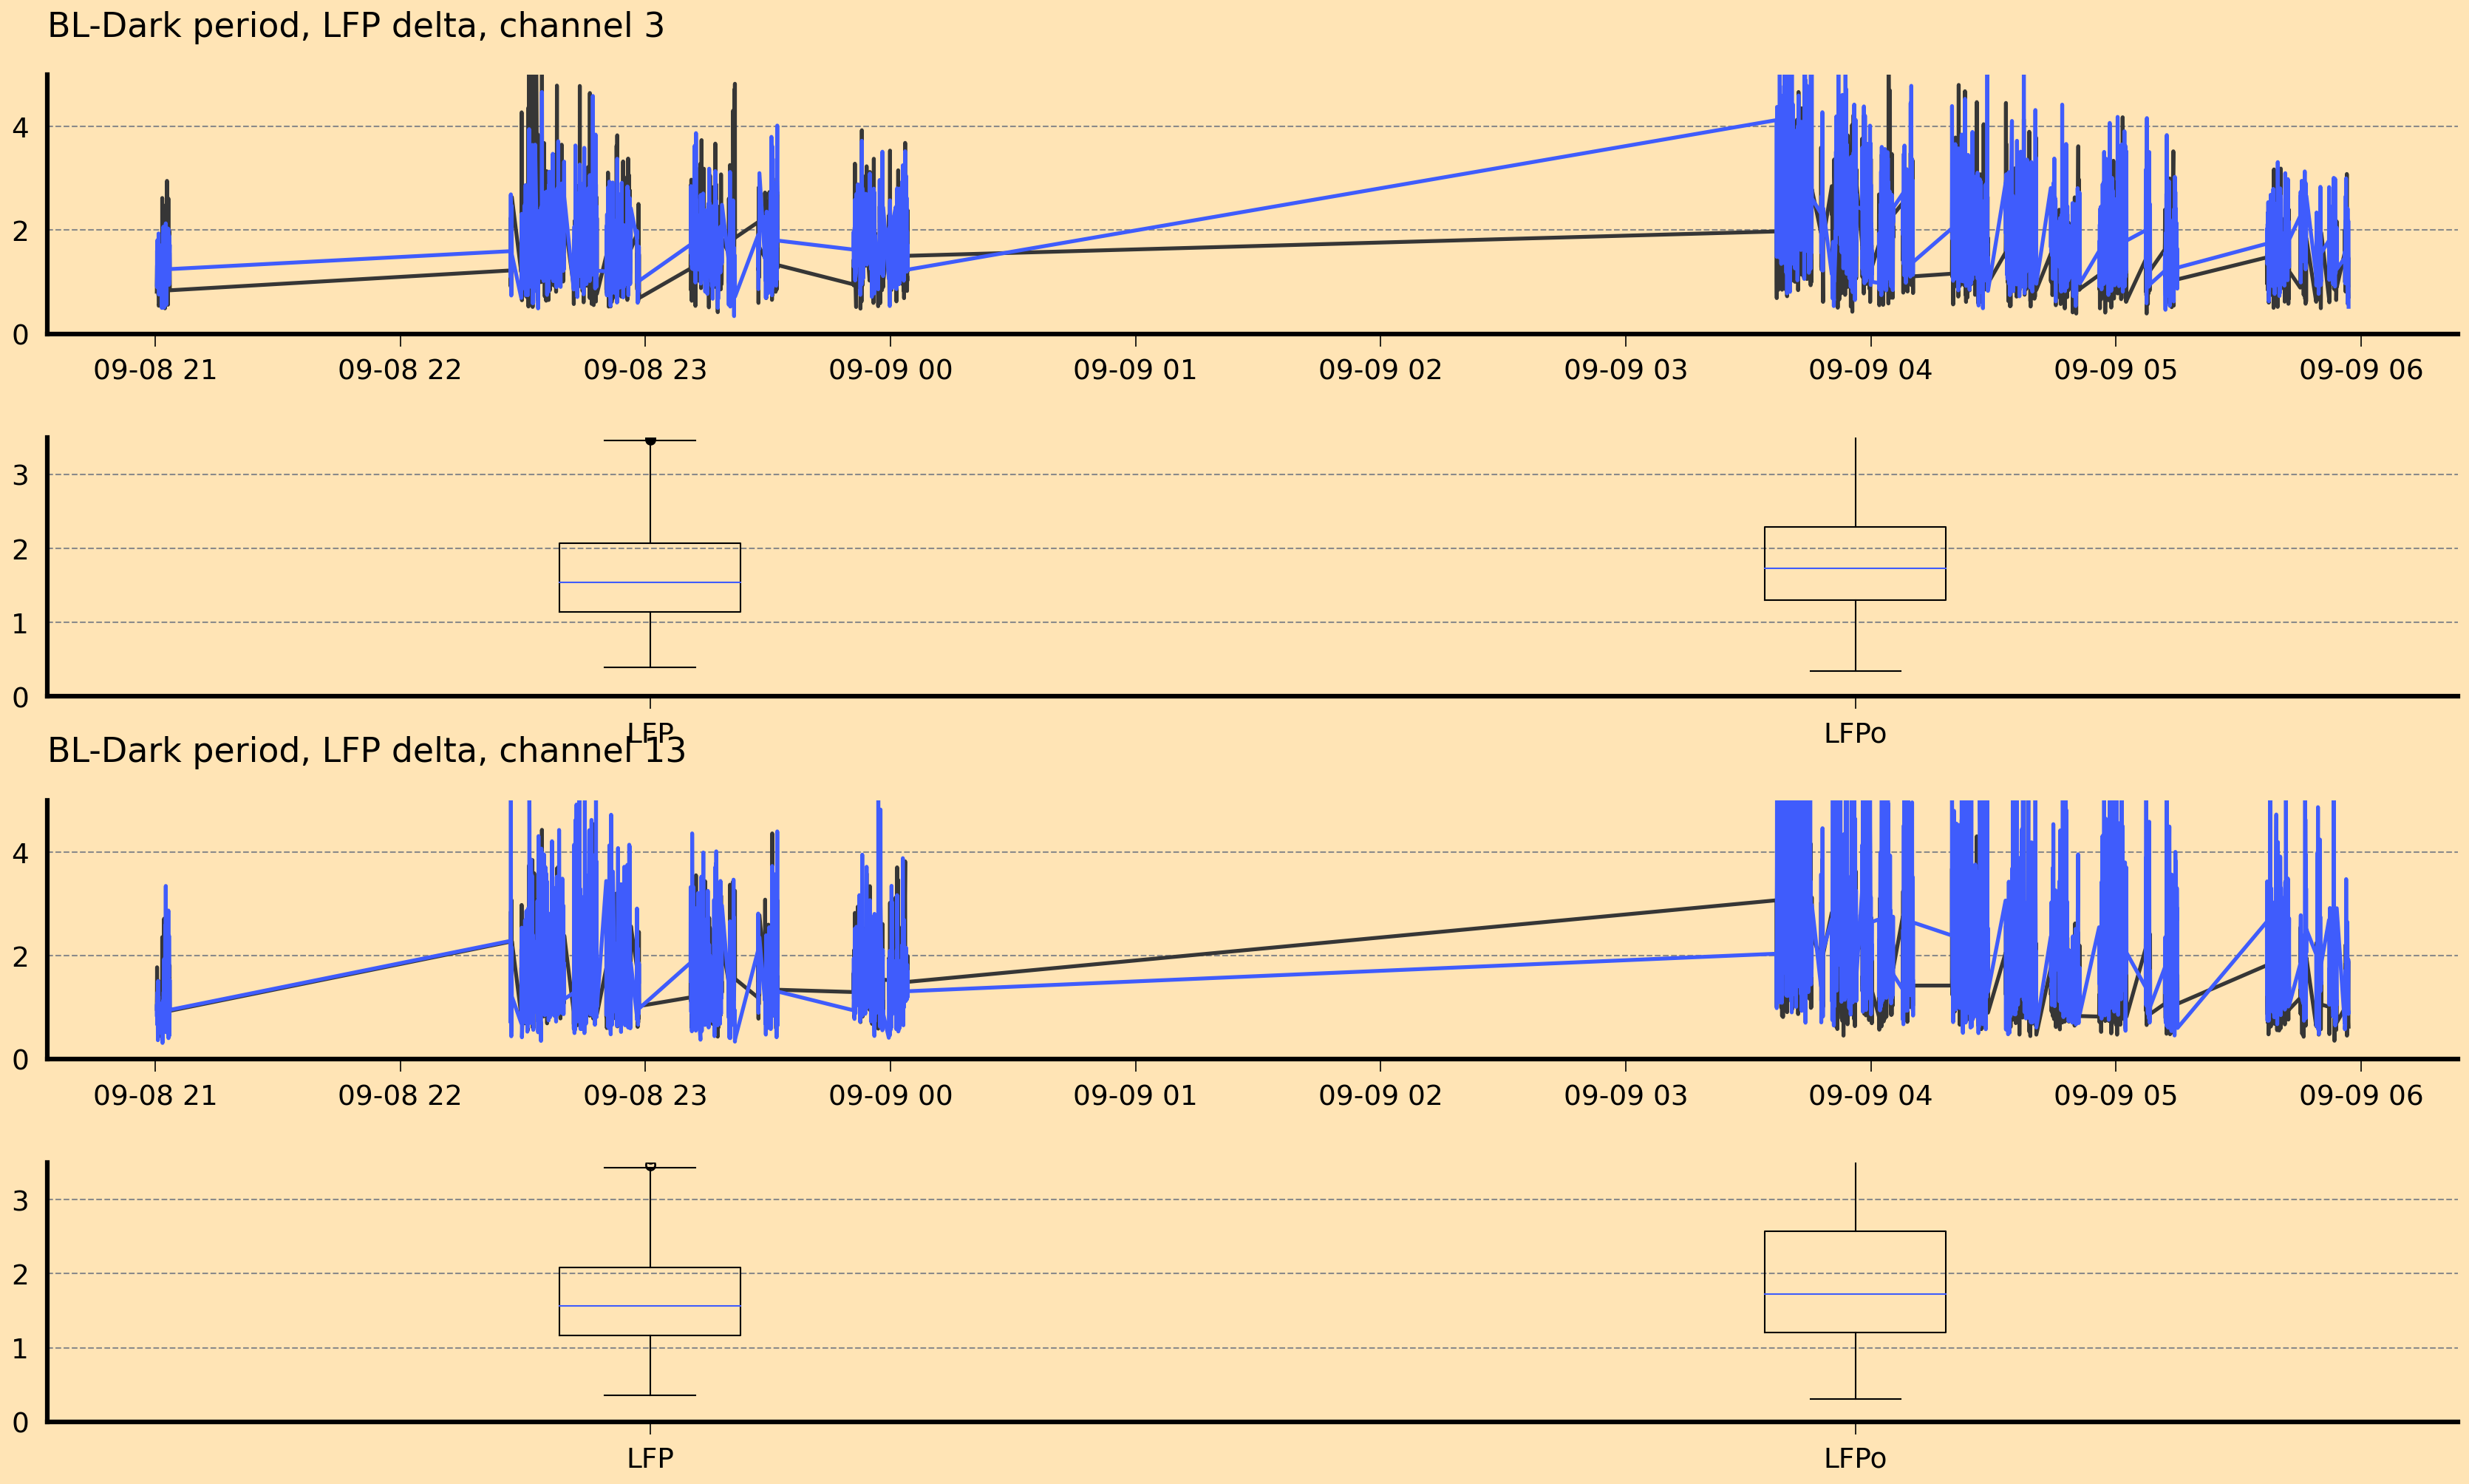

In [163]:
f, ax = plt.subplots(4, 1, figsize=(25, 15))
ax[0].plot(pdrkrel.xc(3).st().dt(), pdrkrel.xc(3).st().delta)
ax[0].plot(odrkrel.xc(3).st().dt(), odrkrel.xc(3).st().delta)
ax[1].boxplot([pdrkrel.xc(3).st().delta, odrkrel.xc(3).st().delta], labels=['LFP', 'LFPo'])
ax[0].set_ylim(0, 5)
ax[1].set_ylim(0, 3.5)
ax[0].set_title('BL-Dark period, LFP delta, channel 3')

ax[2].plot(pdrkrel.xc(13).st().dt(), pdrkrel.xc(13).st().delta)
ax[2].plot(odrkrel.xc(13).st().dt(), odrkrel.xc(13).st().delta)
ax[3].boxplot([pdrkrel.xc(13).st().delta, odrkrel.xc(13).st().delta], labels=['LFP', 'LFPo'])
ax[2].set_ylim(0, 5)
ax[3].set_ylim(0, 3.5)
ax[2].set_title('BL-Dark period, LFP delta, channel 13')

Although it seems that in the last few hours of the dark phase of the BL is perhaps when this difference comes in?

Text(0.0, 1.0, 'Post-Exeriment period, LFP delta, channel 13')

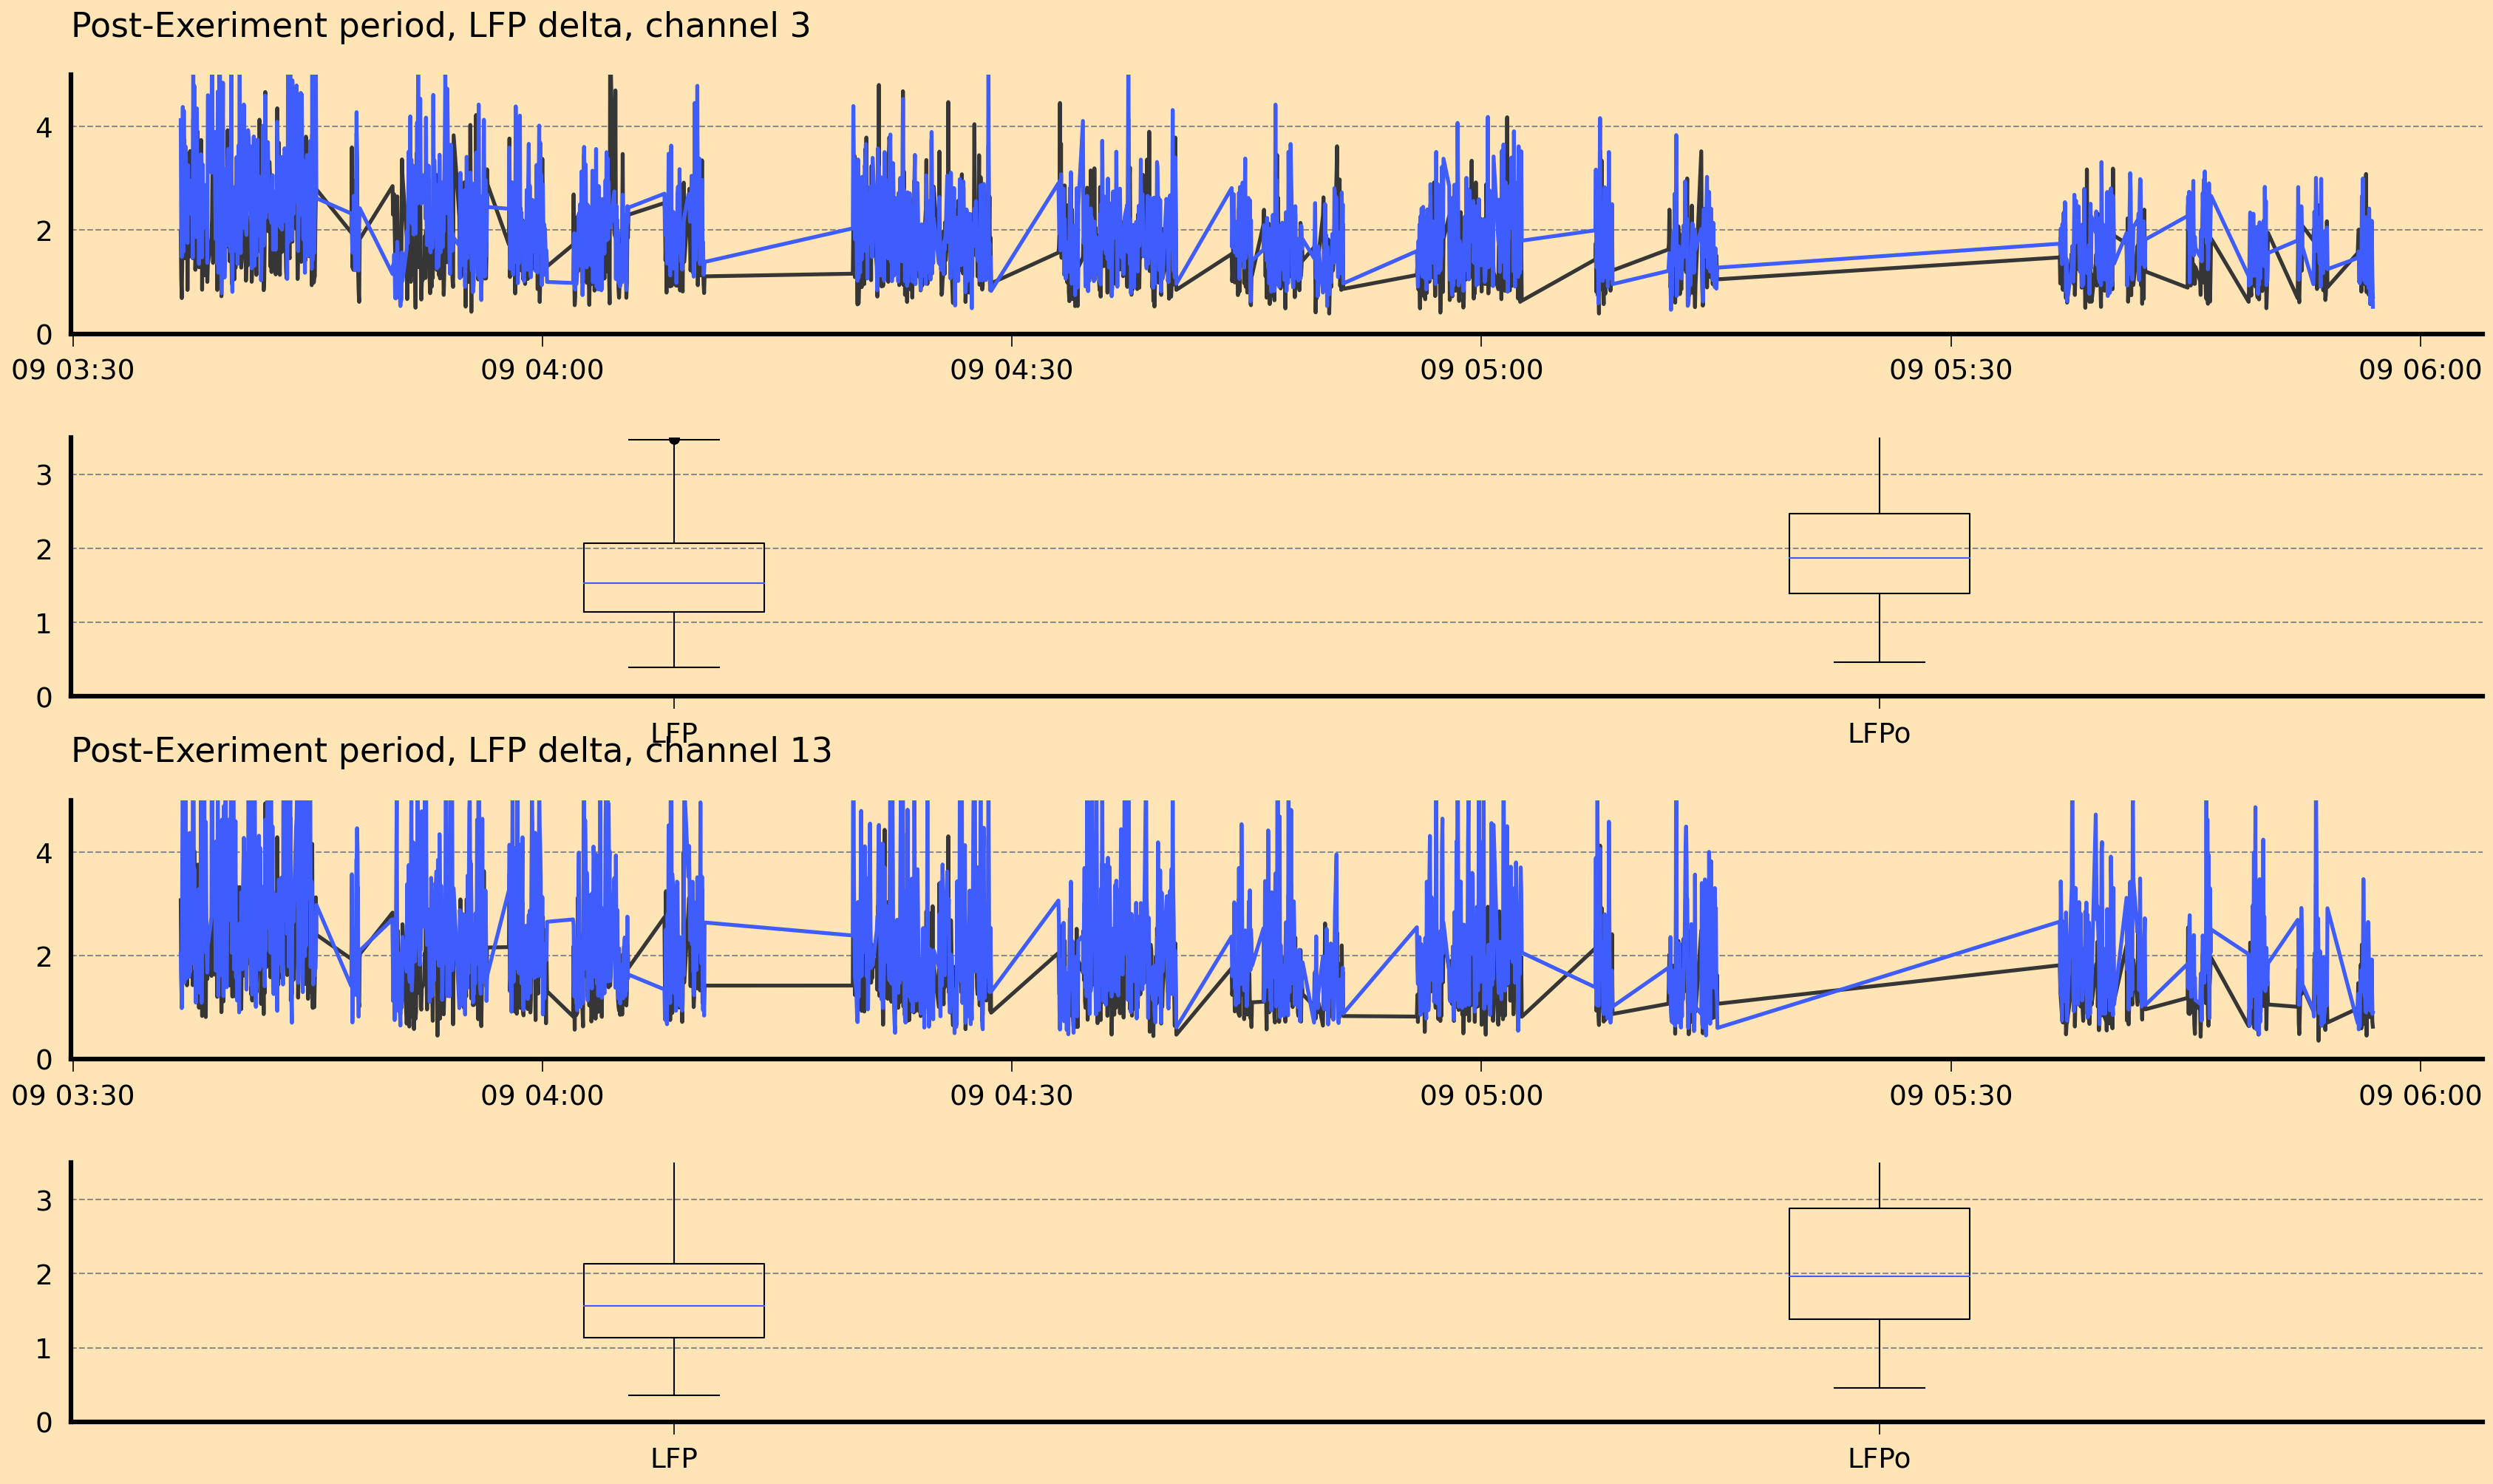

In [174]:
f, ax = plt.subplots(4, 1, figsize=(25, 15))
ax[0].plot(pmrnrel.xc(3).st().dt(), pmrnrel.xc(3).st().delta)
ax[0].plot(omrnrel.xc(3).st().dt(), omrnrel.xc(3).st().delta)
ax[1].boxplot([pmrnrel.xc(3).st().delta, omrnrel.xc(3).st().delta], labels=['LFP', 'LFPo'])
ax[0].set_ylim(0, 5)
ax[1].set_ylim(0, 3.5)
ax[0].set_title('Post-Exeriment period, LFP delta, channel 3')

ax[2].plot(pmrnrel.xc(13).st().dt(), pmrnrel.xc(13).st().delta)
ax[2].plot(omrnrel.xc(13).st().dt(), omrnrel.xc(13).st().delta)
ax[3].boxplot([pmrnrel.xc(13).st().delta, omrnrel.xc(13).st().delta], labels=['LFP', 'LFPo'])
ax[2].set_ylim(0, 5)
ax[3].set_ylim(0, 3.5)
ax[2].set_title('Post-Exeriment period, LFP delta, channel 13')

Here will take as the baseline average 8 hours of NREM in the day FOLLOWING the experiment, and this difference still seems to be present. 
I have no idea how to explain these observations, perhaps this animal is not actually expressing the opsin?

In [182]:
a13 = {}
a13["subject"] = "ACR_13"
a13["complete_key_list"] = ["laser1-post1"]
a13["paths"] = acr.io.get_acr_paths(a13["subject"], a13["complete_key_list"])
a13["load_times"] = {}
a13["load_times"]["laser1-bl"] = (0, 23)
a13["load_times"]["laser1"] = (14027, 6)
a13["load_times"]["laser1-post1"] = (28800, 8)
a13["channels"] = {}
a13["channels"]["EEGr"] = [1, 2]
a13["channels"]["NNXr"] = list(range(1, 17))
a13["channels"]["LFP_"] = [3, 13]
a13["channels"]["LFPo"] = [3, 13]
a13["channels"]["NNXo"] = list(range(1, 17))

a13["times"] = {}
a13["times"]["laser1-pi"] = (16367.83562112, 18097.09928446)

In [194]:
p_, ps, pb, ph = acr.io.acr_load_master(a13, type='pandas', stores=['LFP_', 'LFPo'])

read from t=28800s to t=57959.58s
Using 610.3516 Hz as SEV sampling rate for LFP_
read from t=28800s to t=57959.58s
Using 610.3516 Hz as SEV sampling rate for LFPo


In [198]:
p = bp['laser1-LFP_']
o = bp['laser1-LFPo']

pbl_post = pb['laser1-post1-LFP_']
obl_post = pb['laser1-post1-LFPo']
prel = p.avg(pbl_post)
orel = o.avg(obl_post)

Text(0.0, 1.0, 'PI period, LFP delta, channel 13')

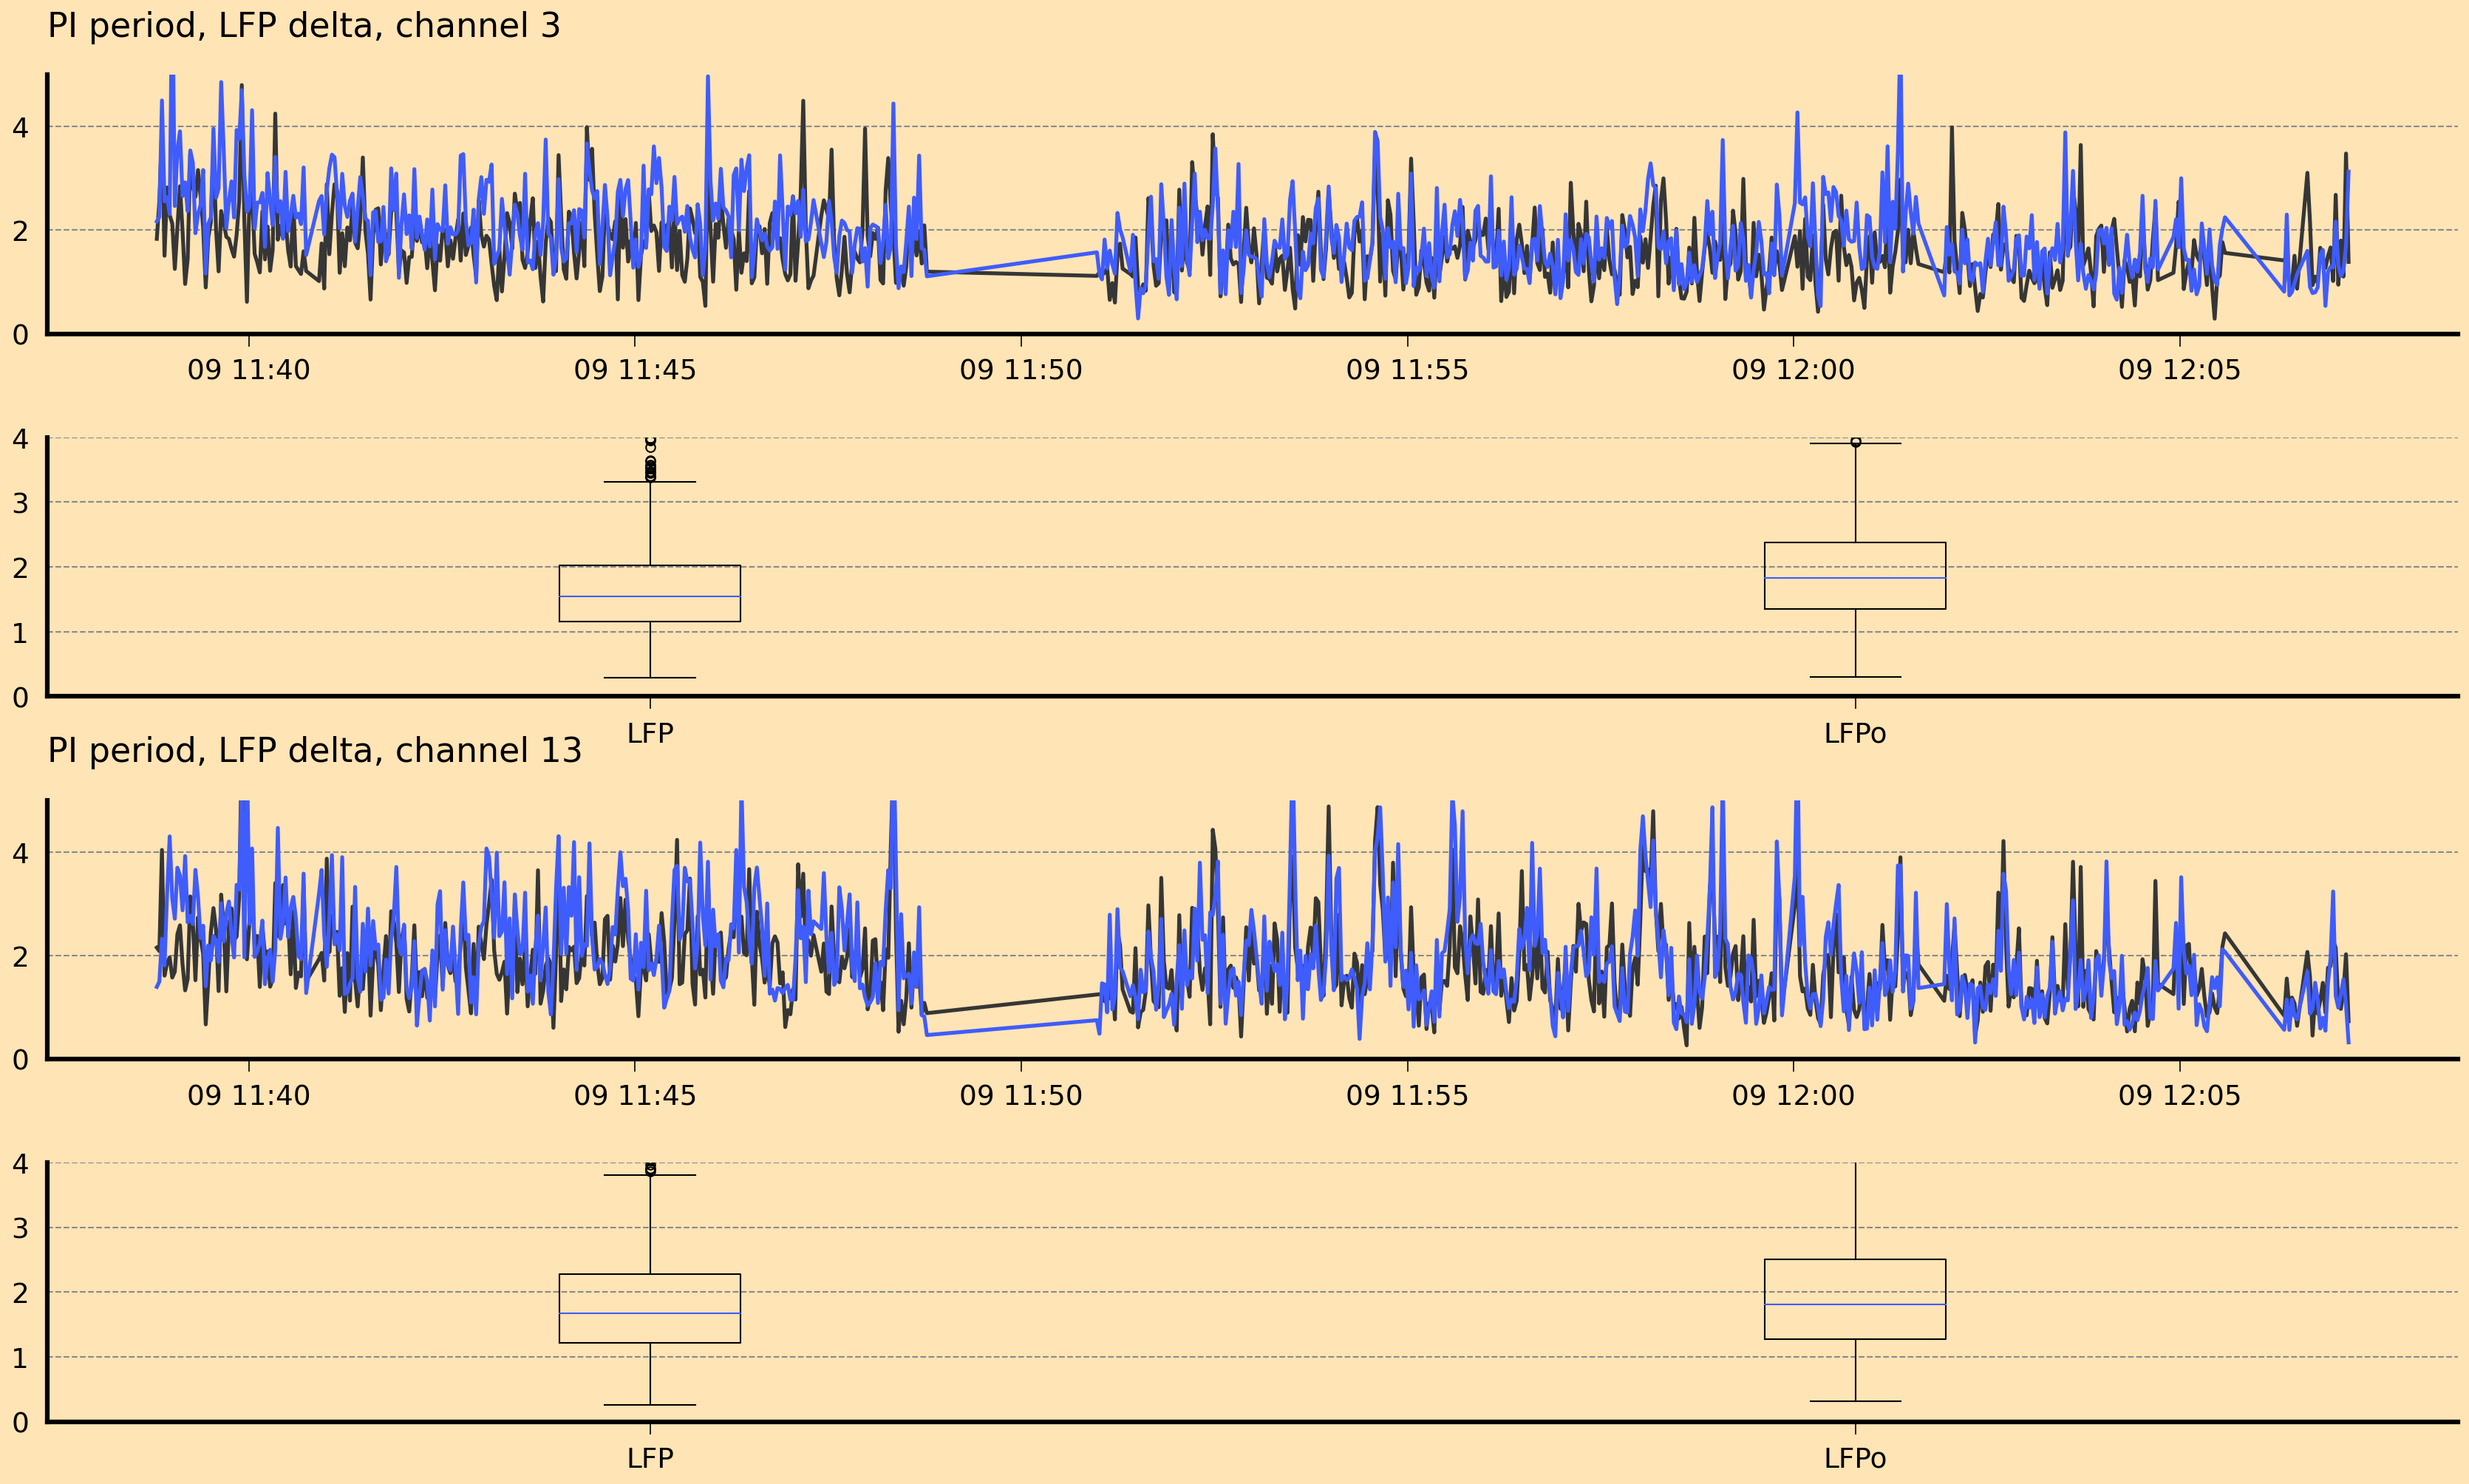

In [199]:
f, ax = plt.subplots(4, 1, figsize=(25, 15))
ax[0].plot(prel.xc(3).st().xt(er).dt(), prel.xc(3).st().xt(er).delta)
ax[0].plot(orel.xc(3).st().xt(er).dt(), orel.xc(3).st().xt(er).delta)
ax[1].boxplot([prel.xc(3).st().xt(er).delta, orel.xc(3).st().xt(er).delta], labels=['LFP', 'LFPo'])
ax[0].set_ylim(0, 5)
ax[1].set_ylim(0, 4)
ax[0].set_title('PI period, LFP delta, channel 3')

ax[2].plot(prel.xc(13).st().xt(er).dt(), prel.xc(13).st().xt(er).delta)
ax[2].plot(orel.xc(13).st().xt(er).dt(), orel.xc(13).st().xt(er).delta)
ax[3].boxplot([prel.xc(13).st().xt(er).delta, orel.xc(13).st().xt(er).delta], labels=['LFP', 'LFPo'])
ax[2].set_ylim(0, 5)
ax[3].set_ylim(0, 4)
ax[2].set_title('PI period, LFP delta, channel 13')

Text(0.0, 1.0, 'Late-Rebound period, LFP delta, channel 13')

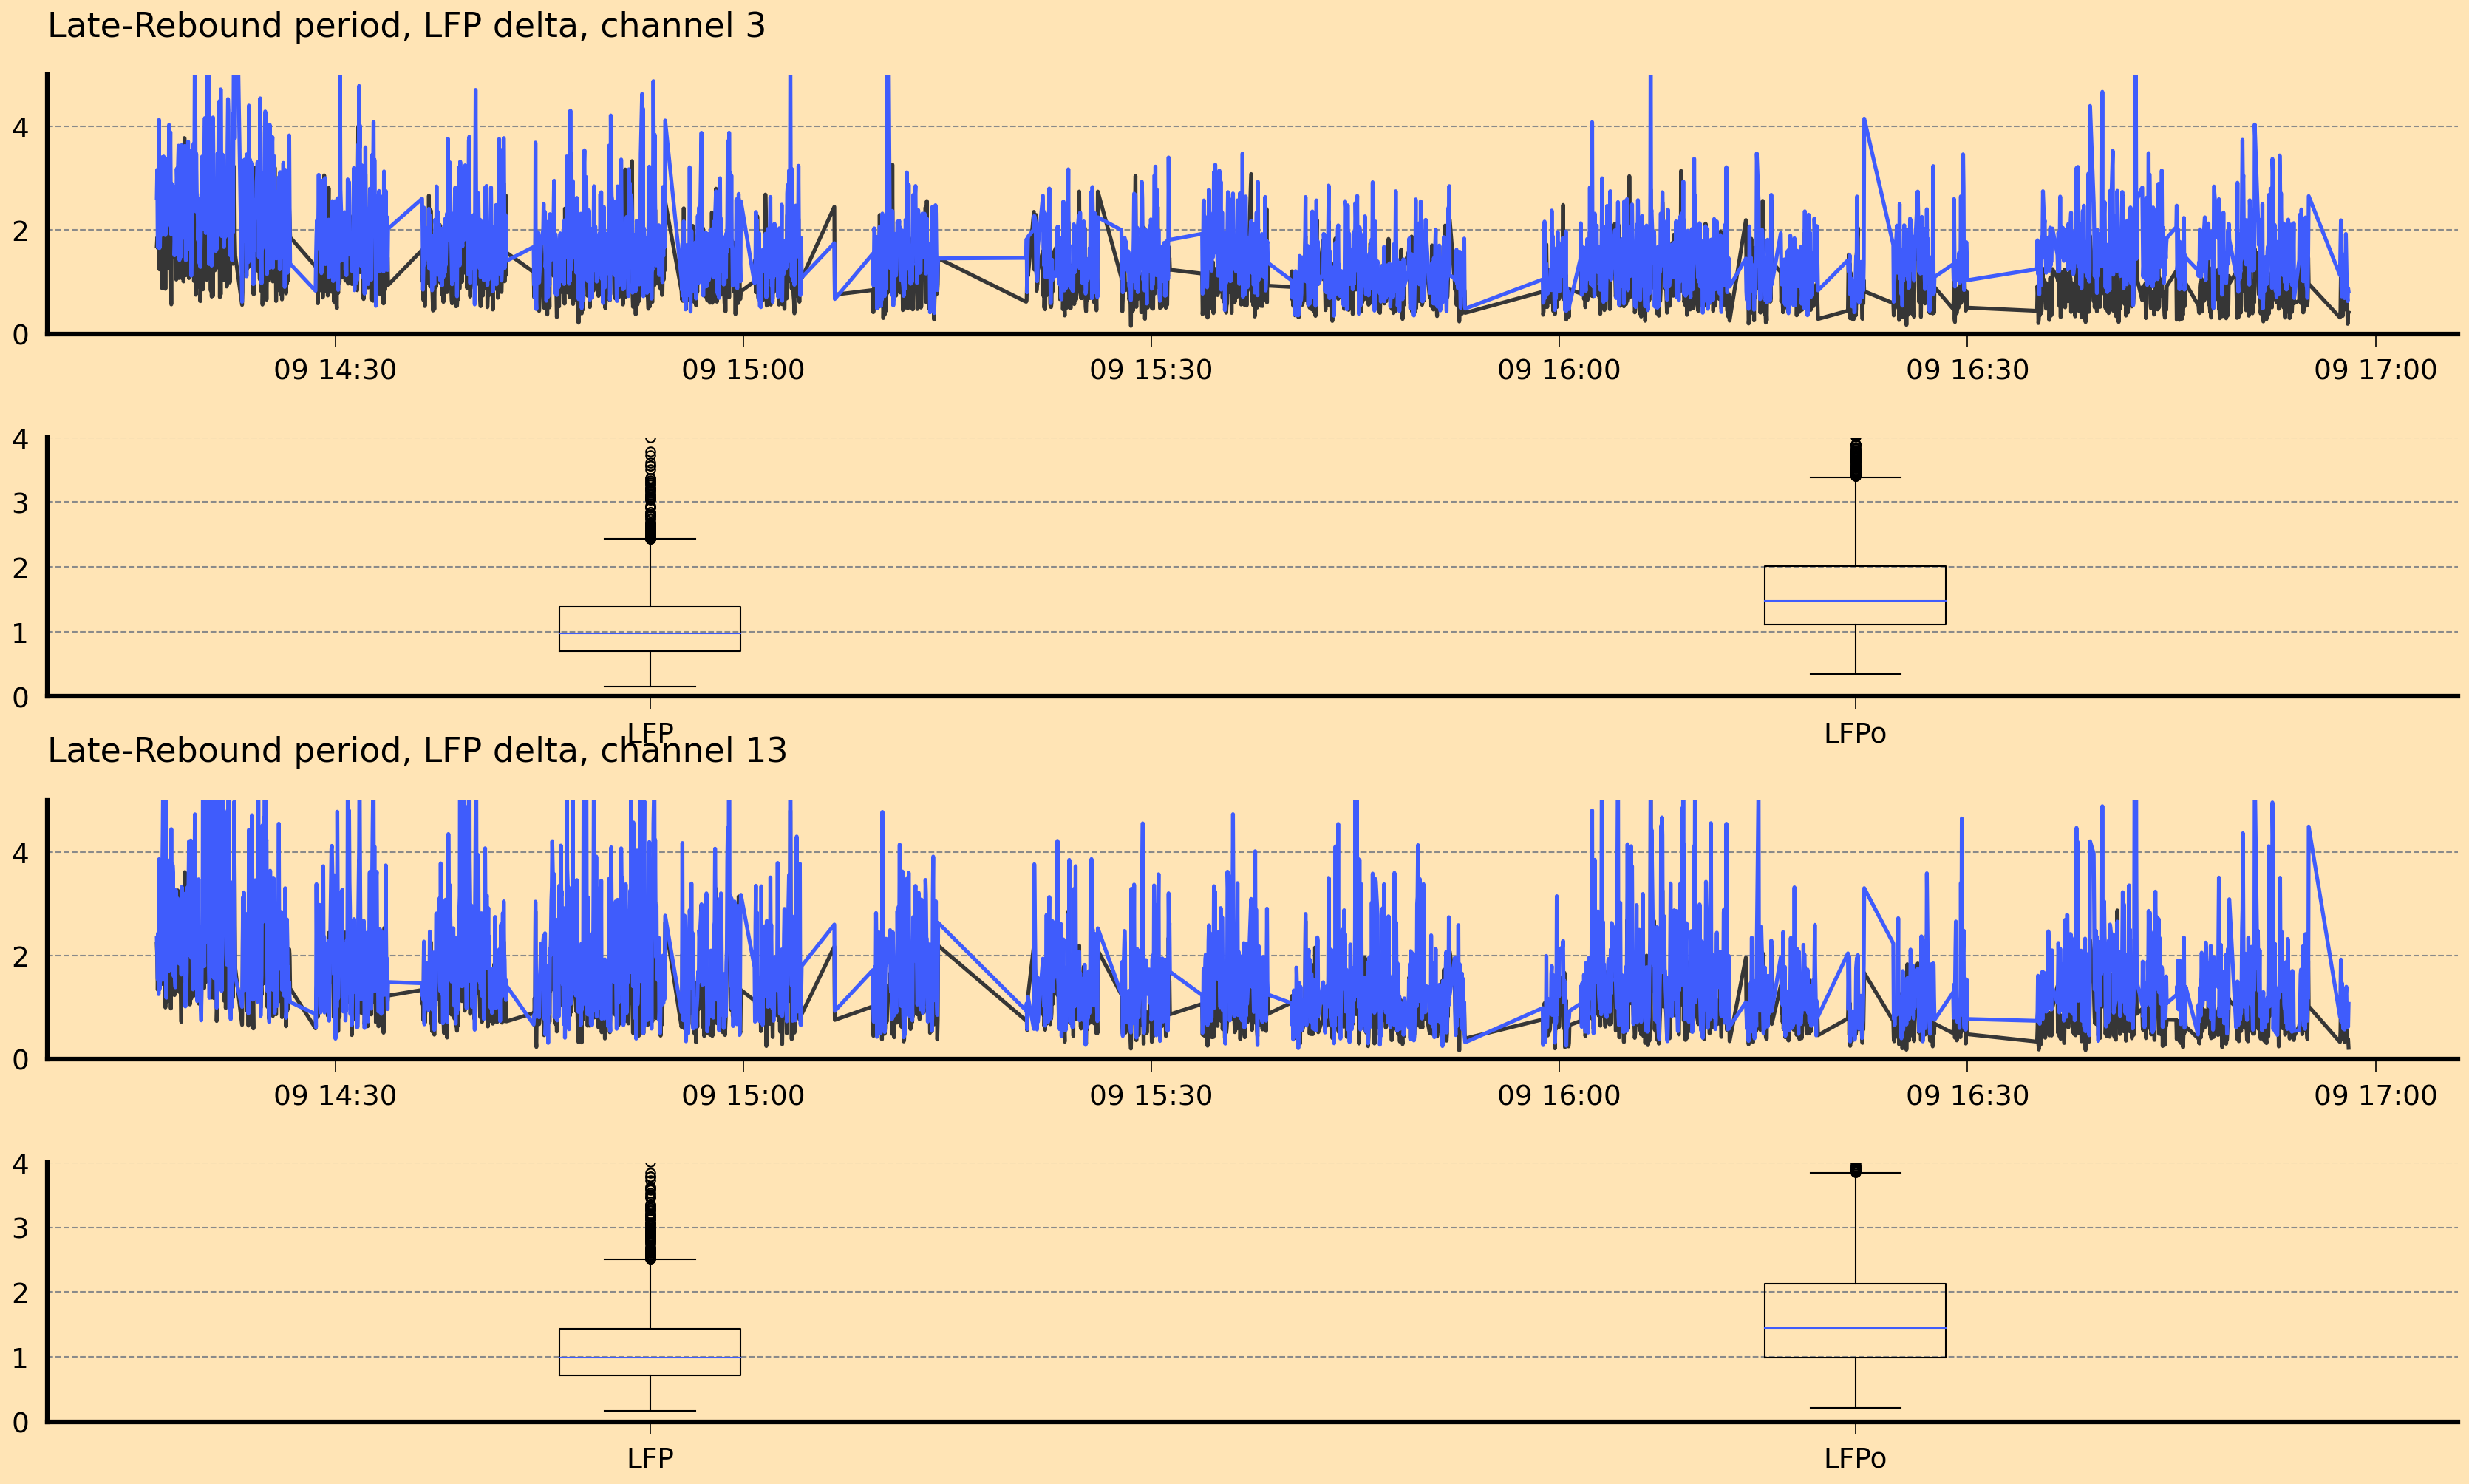

In [200]:
f, ax = plt.subplots(4, 1, figsize=(25, 15))
ax[0].plot(prel.xc(3).st().xt(lr).dt(), prel.xc(3).st().xt(lr).delta)
ax[0].plot(orel.xc(3).st().xt(lr).dt(), orel.xc(3).st().xt(lr).delta)
ax[1].boxplot([prel.xc(3).st().xt(lr).delta, orel.xc(3).st().xt(lr).delta], labels=['LFP', 'LFPo'])
ax[0].set_ylim(0, 5)
ax[1].set_ylim(0, 4)
ax[0].set_title('Late-Rebound period, LFP delta, channel 3')

ax[2].plot(prel.xc(13).st().xt(lr).dt(), prel.xc(13).st().xt(lr).delta)
ax[2].plot(orel.xc(13).st().xt(lr).dt(), orel.xc(13).st().xt(lr).delta)
ax[3].boxplot([prel.xc(13).st().xt(lr).delta, orel.xc(13).st().xt(lr).delta], labels=['LFP', 'LFPo'])
ax[2].set_ylim(0, 5)
ax[3].set_ylim(0, 4)
ax[2].set_title('Late-Rebound period, LFP delta, channel 13')

# What about the EEG?

In [ ]:
mn = bp['laser1-bl-EEGr'].filt_state().groupby('channel').mean()

In [ ]:
lrel = bp['laser1-EEGr'].bix()/mn

Looks like we don't really have this going on in the EEG, although there is a slight difference:

(0.0, 3.0)

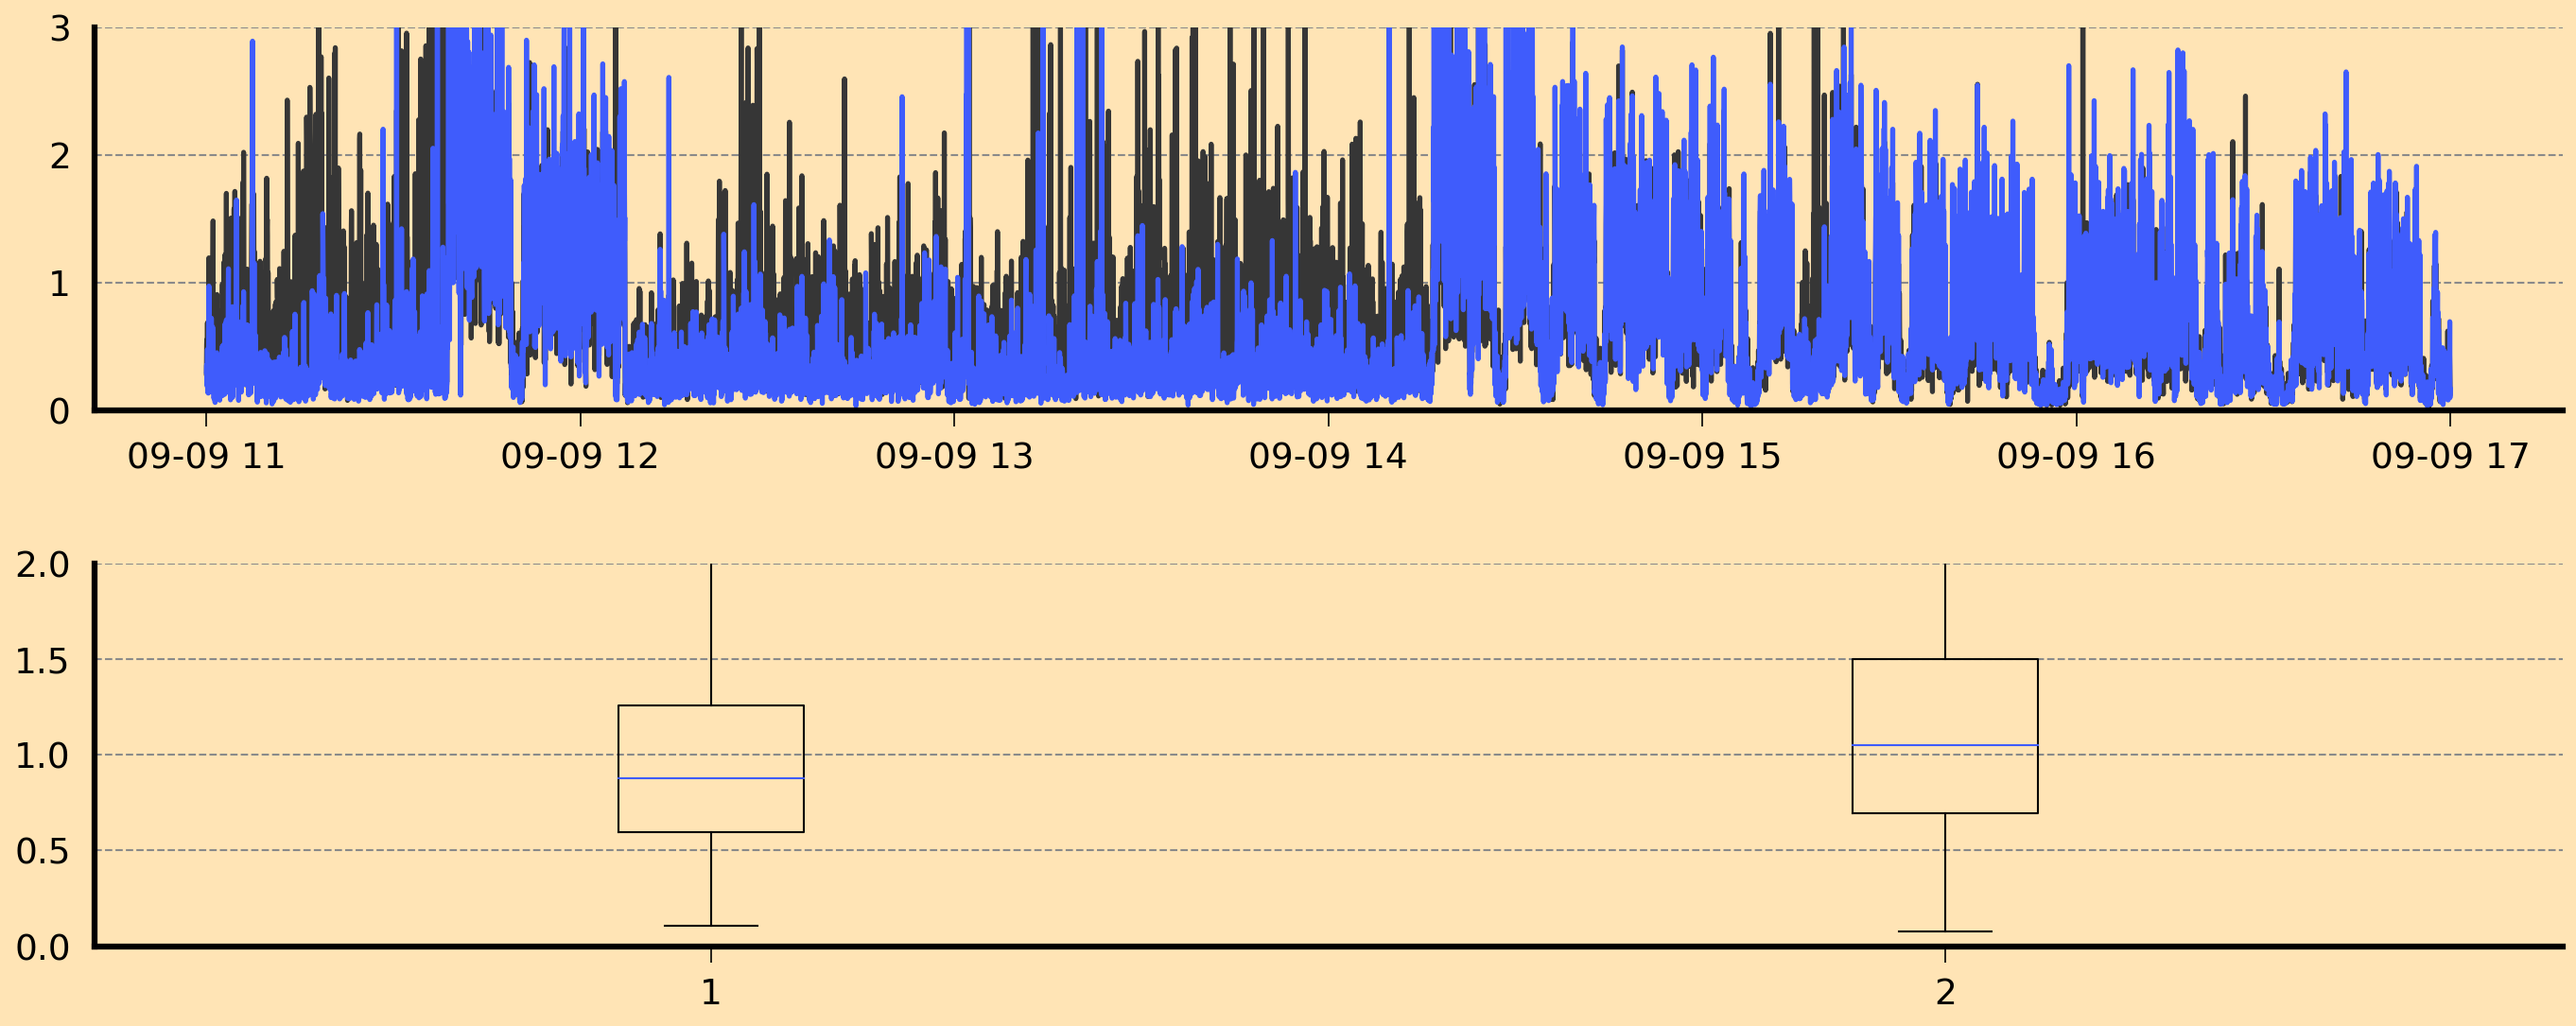

In [201]:
f, ax = plt.subplots(2, 1, figsize=(20, 8))
ax[0].plot(lrel.xc(1).index.levels[0], lrel.xc(1).delta)
ax[0].plot(lrel.xc(2).index.levels[0], lrel.xc(2).delta)
ax[1].boxplot([lrel.xc(1).st().delta, lrel.xc(2).st().delta])
ax[1].set_ylim(0, 2)
ax[0].set_ylim(0, 3)